<p style="text-align:center;"><span style="font-size:60px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋</span></span></span></span></p>

In [1]:
##### PIC

<div style="border-radius:10px; padding: 15px; background-color: #e3e6fa; text-align:left; font-size:120%">

<h4 align="left"><span style="font-weight:700; font-size:160%"><font color=#d10202>Description:</font></span></h4>


<a id="setup"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Table Of Content</p></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #e3e6fa; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2>

 * **[Step 1 | Nessesary Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
 *  **[Step 3 | Data Wrangling](#data_wrangling)**
    -  [3.1 | Missing Values](#missing)
    -  [3.3 | Plots and Outliers](#plots)
    -  [3.4 | One Hot Encoder](#onehot)
    -  [3.5 | Geographic Map](#geomap)
 *  **[Step 4 | Macine Learning](#ml)**
    -  [4.1 | Initializations](#init)
    -  [4.2 | LogisticRegression](#lr)
    -  [4.3 | SVC](#svc)
    -  [4.4 | DecisionTreeClassifier](#tree)
    -  [4.5 | KNeighborsClassifier](#knn)
    -  [4.6 | result](#result)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 1 | Nessasary Libraries</p></h1>

<a id="import"></a>
<h2><b><span style="color:#0266b7">Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b></h2>

In [2]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

<a id="lib_config"></a>
<h2><b><span style="color:#0266b7">Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b></h2>

In [3]:
pd.options.mode.copy_on_write = True # Allow re-write on variable

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings


<a id="data"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 2 | Data</p></h1>

<a id="load_data"></a>
<h2><b><span style="color:#0266b7">Step 2.1 | </span><span style="color:#ff6200">Load Data</span></b></h2>

In [5]:
data = pd.read_csv('Country_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


<a id="data_wrangling"></a>
<h1><p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 3 | Data Wrangling </p></h1>

<a id="missing"></a>
<h2><b><span style="color:#0266b7">Step 3.1 | </span><span style="color:#ff6200"> Missing Values</span></b></h2>

In [8]:
data.isna().sum().sum()

0

<a id="plot"></a>
<h2><b><span style="color:#0266b7">Step 3.2 | </span><span style="color:#ff6200"> Plots and Outliers</span></b></h2>

In [9]:
colmns = data.columns
colmns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

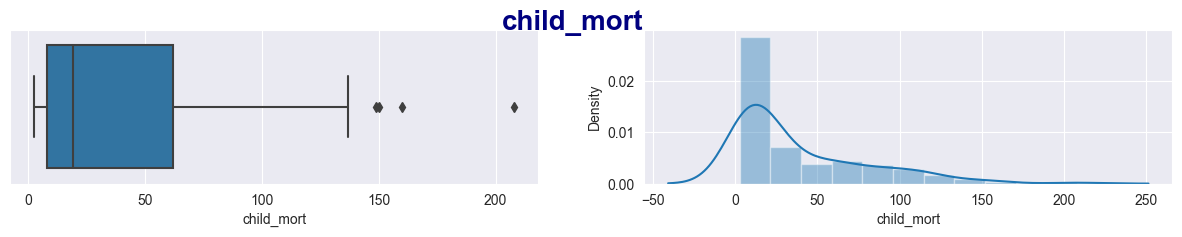

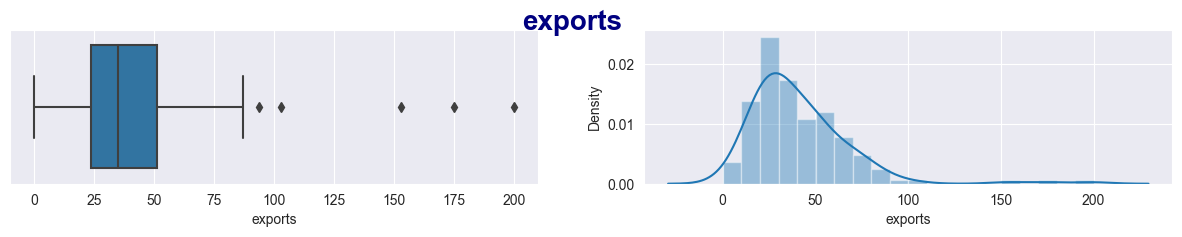

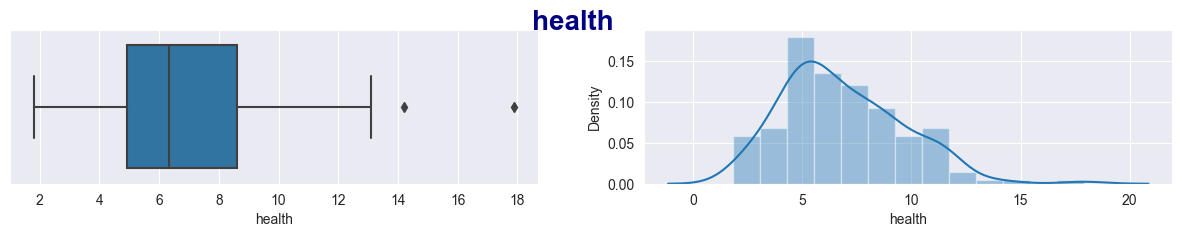

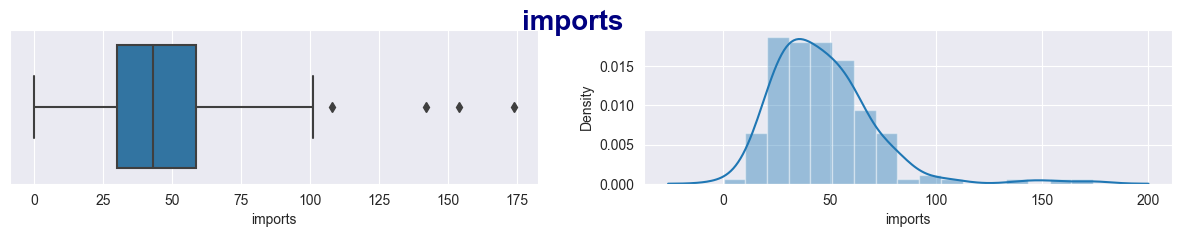

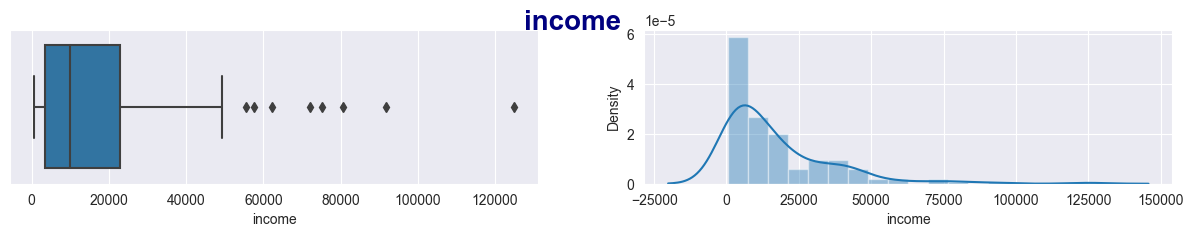

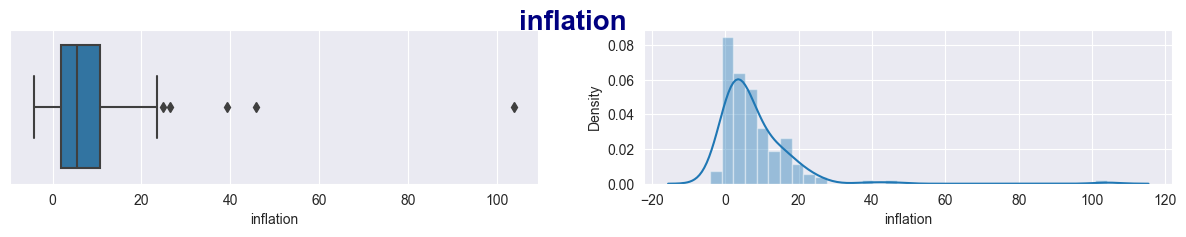

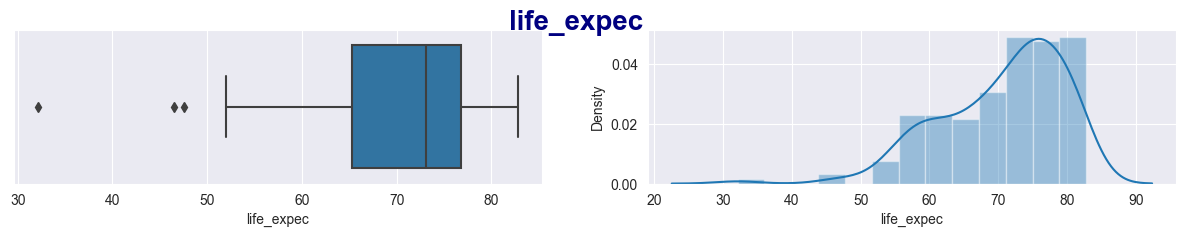

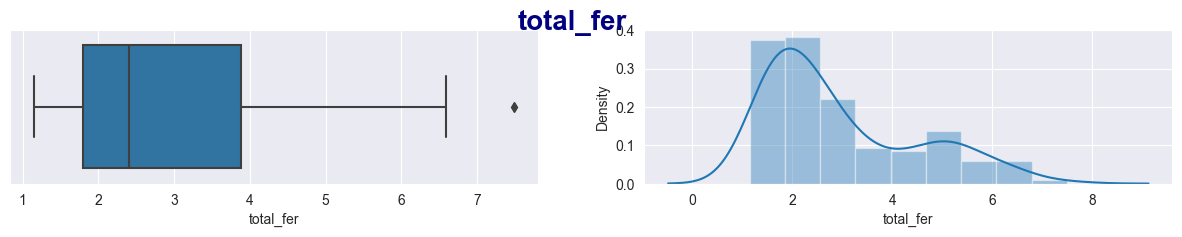

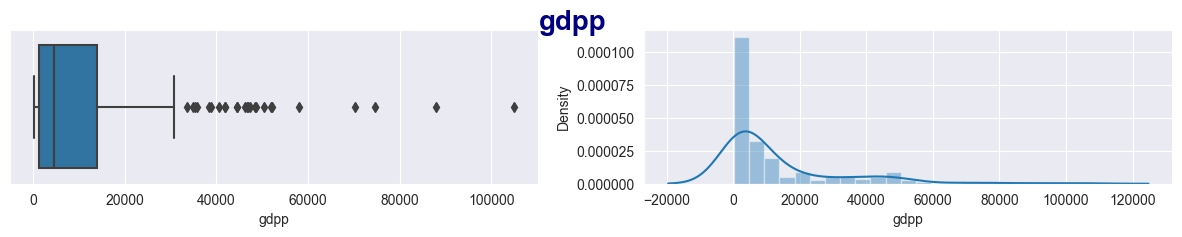

In [30]:
for i in range(1, 10) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(x=colmns[i], data=data, ax=ax[0])
    # Right Plot
    sns.distplot(data[colmns[i]], ax=ax[1])

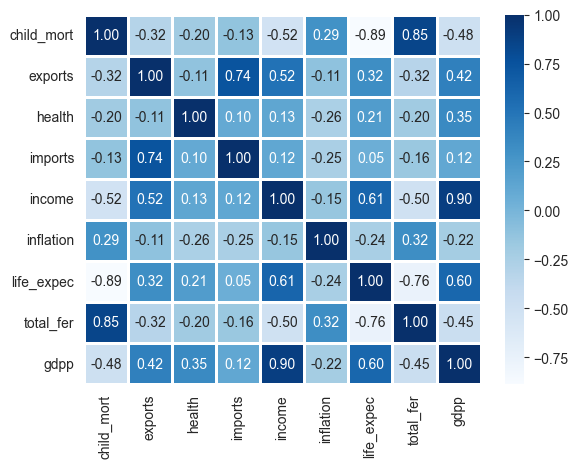

In [55]:
sns.heatmap(data=data.iloc[:, 1:].corr(), annot=True, fmt=".2f", linewidth=0.75, cmap="Blues")
plt.show()

<h3 style="font-weight:700">Most related features :</h3>
<ul><span style="color:green; font-weight:600">income | gdpp : 0.90</span></ul>
<ul><span style="color:red; font-weight:600">life_expect | child_mort : -0.89</span></ul>
<ul><span style="color:green; font-weight:600">total_fer | child_mort : 0.85</span></ul>